In [159]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [160]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [161]:
data.shape

(1025, 14)

In [162]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [163]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

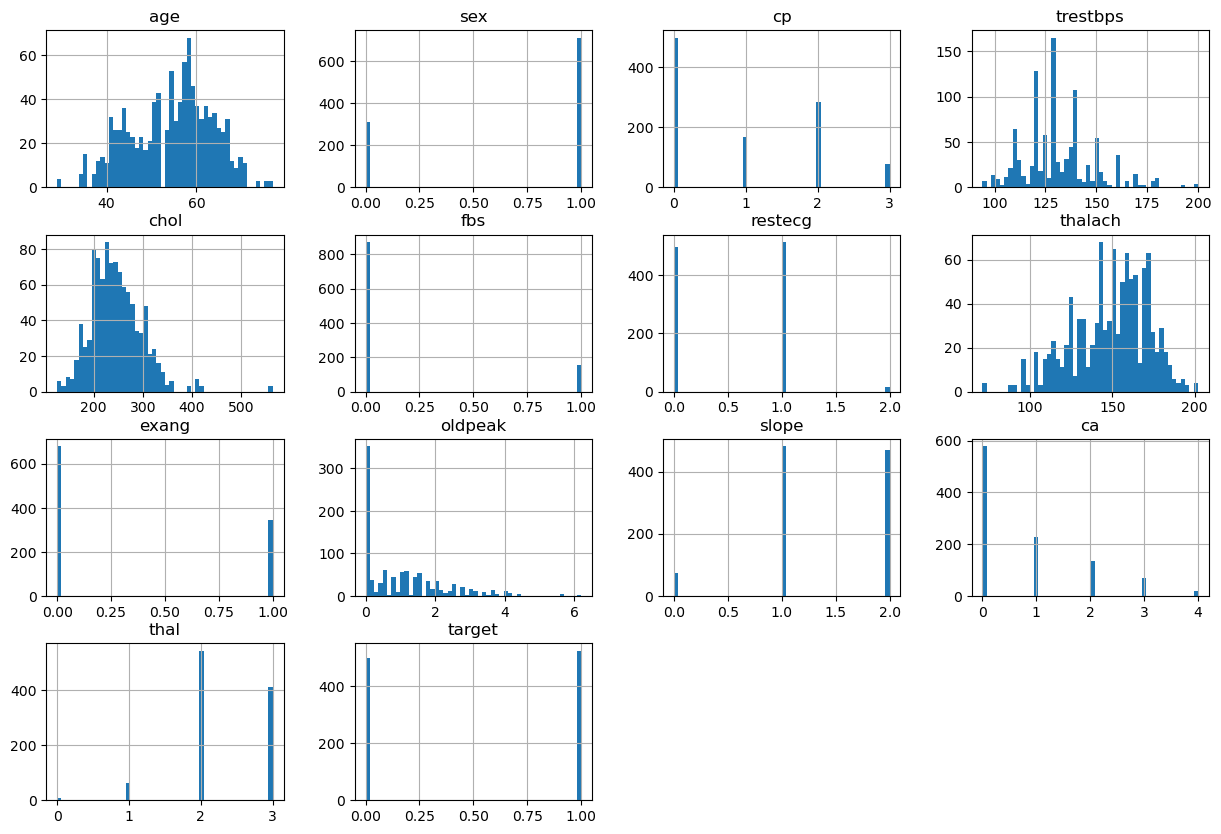

In [164]:
data.hist(bins=50,figsize=(15,10))

In [165]:
missing_values = data.isnull().sum()
missing_data_info = pd.DataFrame({
    'Column Name': data.columns,
    'Missing Values': missing_values,
})
print(missing_data_info)

         Column Name  Missing Values
age              age               0
sex              sex               0
cp                cp               0
trestbps    trestbps               0
chol            chol               0
fbs              fbs               0
restecg      restecg               0
thalach      thalach               0
exang          exang               0
oldpeak      oldpeak               0
slope          slope               0
ca                ca               0
thal            thal               0
target        target               0


In [166]:
data.duplicated().sum()

723

In [167]:
# Identify columns with duplicated values
data.columns[data.apply(lambda x: x.duplicated(keep=False)).any()].tolist()

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

###  simple example to illustrate how enumerate() works:
fruits = ['apple', 'banana', 'cherry']

for index, fruit in enumerate(fruits):
    print(f"Index: {index}, Fruit: {fruit}")

## Outputs:
Index: 0, Fruit: apple
Index: 1, Fruit: banana
Index: 2, Fruit: cherry


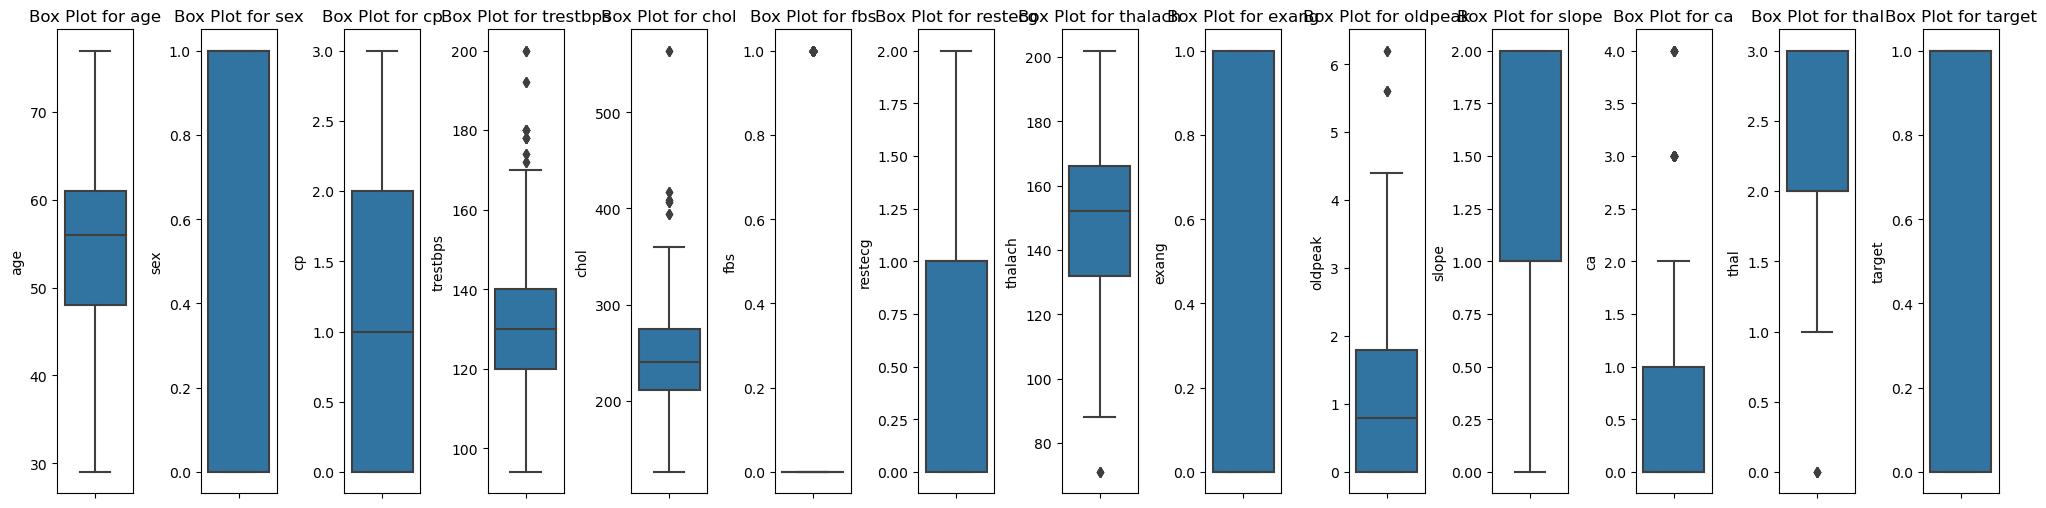

In [168]:
numeric_columns = data.select_dtypes(include=['int', 'float']).columns

fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=data, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

###   outlier detection and removal using the Interquartile Range (IQR) method

In [169]:
iqr_threshold = 1.5

for column in numeric_columns:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_threshold * iqr
    upper_bound = q3 + iqr_threshold * iqr
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

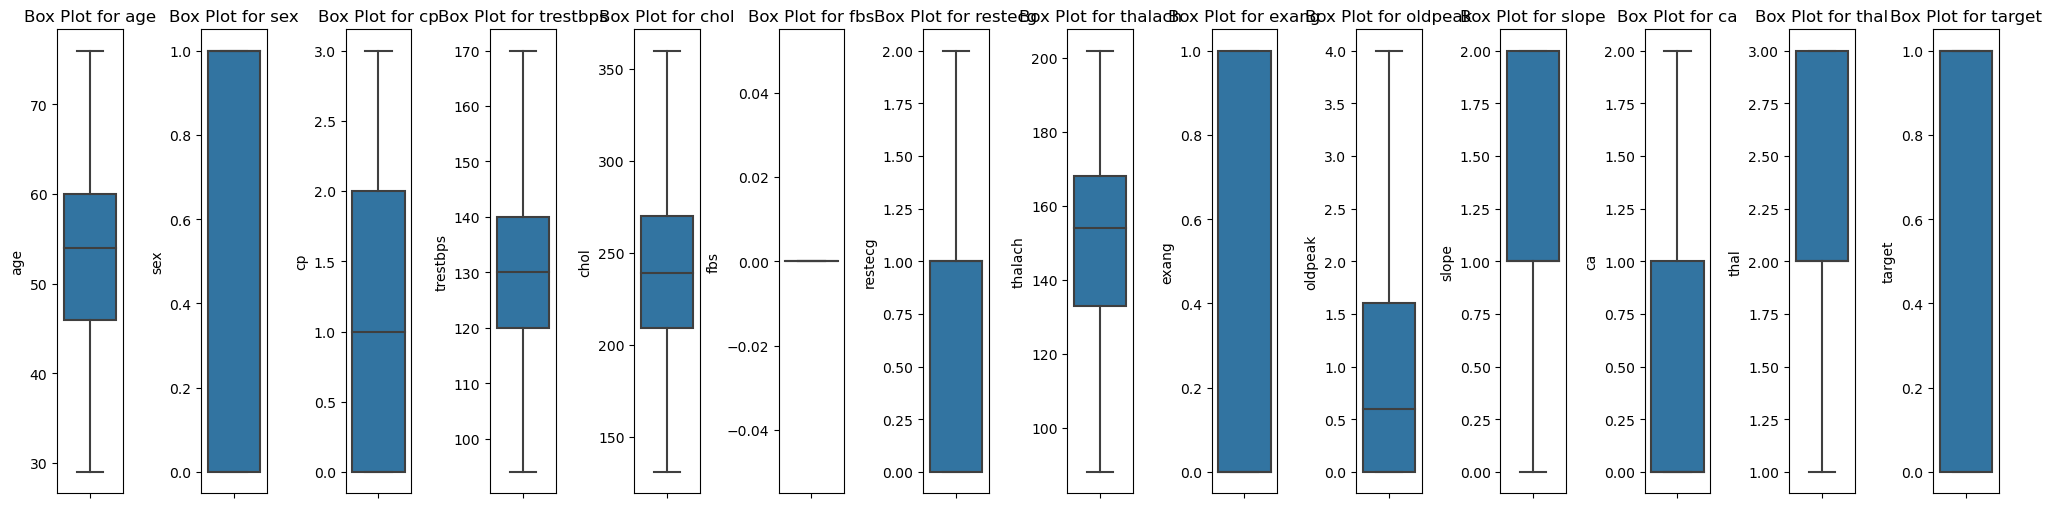

In [170]:
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(20, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=data, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

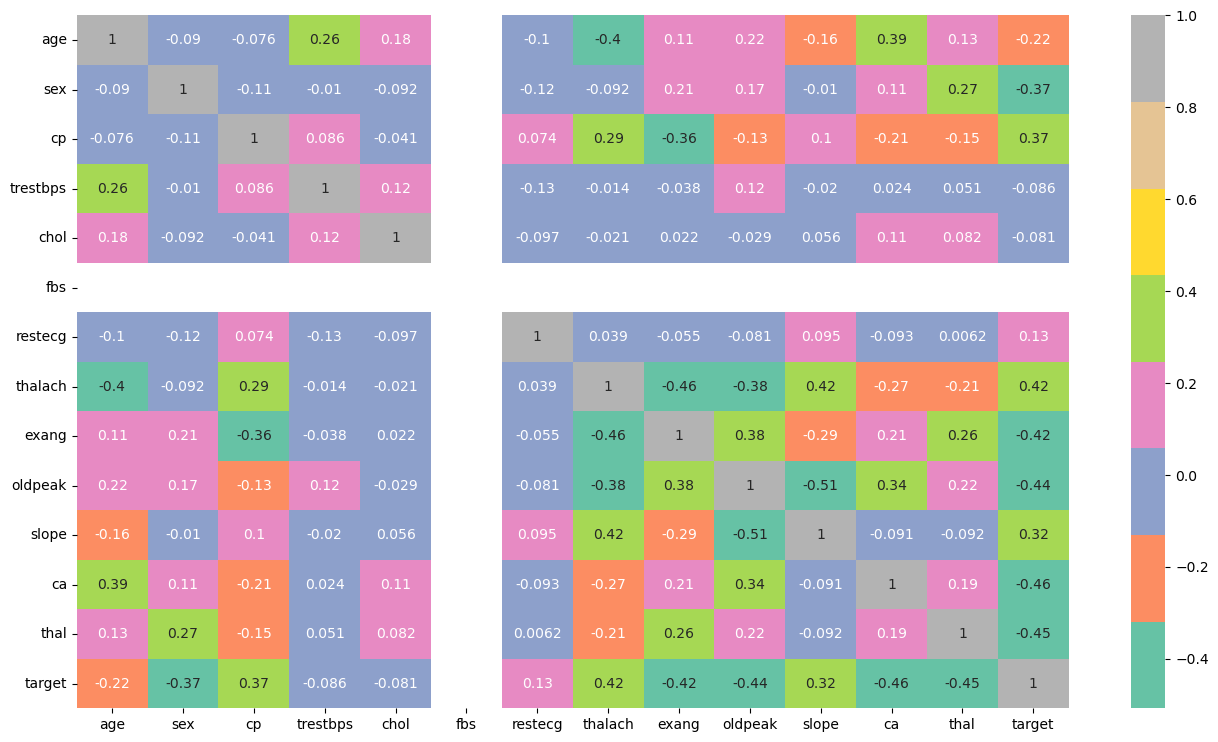

In [171]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set2')
plt.show()

In [172]:
# training and normalization of data
X = data.drop('target', axis=1)  # Independent variables (features)
Y = data['target']  # Dependent variable (target

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

SScaler = StandardScaler()
X_train_scaled  = SScaler.fit_transform(X_train)
X_test_scaled  = SScaler.transform(X_test)

In [173]:
def impressions(model, accuracy, Y_pred):
    print('Accuracy:{} %'.format(accuracy))
    print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))


    cm=confusion_matrix(Y_test,Y_pred)
    class_label = [0, 1]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [174]:
def roc_curve(Y_test, Y_score):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(Y_test, Y_score)
    score = metrics.auc(fpr, tpr)

    # this below code is for creating matplotlib 
    fig = px.area(
        #fpr = False Positive Rate; tpr= True Positive Rate
        x=fpr, y=tpr,
        title=f'ROC Curve (AUC={auc(fpr, tpr):.4f})',
        labels=dict(x='False Positive Rate', y='True Positive Rate'),
        width=700, height=500
    )

    fig.add_shape(
        type='line', line=dict(dash='dash'),
        x0=0, x1=1, y0=0, y1=1
    )

    fig.update_yaxes(scaleanchor="x", scaleratio=1)
    fig.update_xaxes(constrain='domain')
    fig.show()

### using  RandomForestClassifier

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/kali/

Random Forest Accuracy: 98.05199999999999
Accuracy:98.05199999999999 %
Mean squared error:  0.019


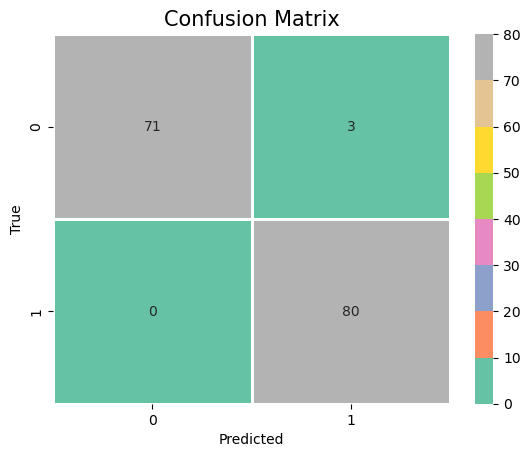

In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import accuracy_score

# Assuming 'X_train', 'X_test', 'Y_train', 'Y_test' are already defined

model = RandomForestClassifier(criterion='entropy', max_depth=20, max_features=3,
                               max_samples=1.0, n_estimators=32)

model_rf = model.fit(X_train_scaled, Y_train)

crossvalidation = KFold(n_splits=5, shuffle=True, random_state=0)

search_grid = {'n_estimators': [16, 32, 50],
               'criterion': ['gini', 'entropy', 'log_loss'],
               'max_features': [3, 4, 5, 6],
               'max_depth': [5, 20, 50],
               'max_samples': [0, 0.2, 0.3, 0.5, 1.0],
               'bootstrap': [True]}
search = GridSearchCV(estimator=model, param_grid=search_grid, scoring='f1', n_jobs=1, cv=crossvalidation)
search.fit(X_train_scaled, Y_train)

rf_params = search.best_params_
opt_rf = RandomForestClassifier(**rf_params)

# Fit the optimal RandomForestClassifier with training data
opt_rf.fit(X_train_scaled, Y_train)

# Calculate cross-validation scores
rf_train_score = np.mean(cross_val_score(opt_rf, X_train_scaled, Y_train, scoring='f1', cv=crossvalidation, n_jobs=1))
rf_test_score = np.mean(cross_val_score(opt_rf, X_test_scaled, Y_test, scoring='f1', cv=crossvalidation, n_jobs=1))

# Predict and evaluate on the test set
Y_pred = opt_rf.predict(X_test_scaled)


rf_accuracy = round(accuracy_score(Y_test, Y_pred), 5) * 100
print("Random Forest Accuracy:", rf_accuracy)

impressions(opt_rf, rf_accuracy, Y_pred) # function calling

In [177]:
# Print or use the cross-validation scores as needed
print("Optimal Decision Tree Training Score (F1):", rf_train_score)
print("Optimal Decision Tree Testing Score (F1):", rf_test_score)

Optimal Decision Tree Training Score (F1): 0.9821684916766884
Optimal Decision Tree Testing Score (F1): 0.8208112136215258


### using  DecisionTreeClassifier

Accuracy:100.0 %
Mean squared error:  0.0


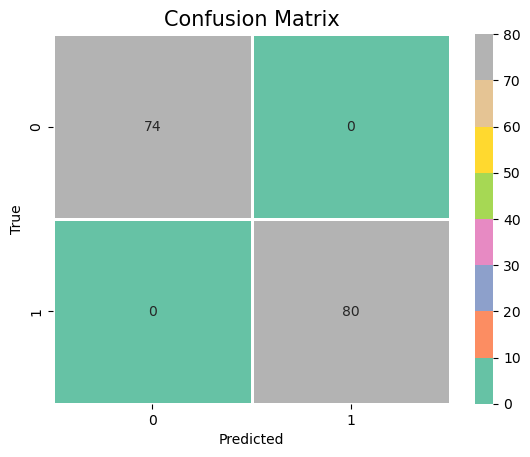

In [178]:
#hypertuning
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier

# Create DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1, max_depth=200)
tree.fit(X_train_scaled,Y_train)

# Define cross-validation
crossvalidation = KFold(n_splits = 5, shuffle = True, random_state = 0)

# Define search grid
search_grid = {
             
             'max_features': [2,3,4,5,6,7,8,9,10,11,12],
                'max_depth': [2,4,6,8,10,15,20,50],
               'criterion': ['gini','entropy','log_loss'],
               'splitter': ['best','random'],
               'min_samples_split':[2,3,4,5]
}

# Perform grid search
search=GridSearchCV(estimator=tree,param_grid=search_grid,scoring='f1',n_jobs=1,cv=crossvalidation)
search.fit(X_train_scaled,Y_train)

# Get best parameters and create optimal DecisionTreeClassifier
dt_params = search.best_params_
opt_dt = DecisionTreeClassifier(**dt_params)

# Fit the optimal DecisionTreeClassifier with training data
opt_dt.fit(X_train_scaled, Y_train)

# Calculate cross-validation scores
dt_train_score=np.mean(cross_val_score(opt_dt,X_train_scaled,Y_train,scoring='f1',cv=crossvalidation,n_jobs=1))
dt_test_score=np.mean(cross_val_score(opt_dt,X_test_scaled,Y_test,scoring='f1',cv=crossvalidation,n_jobs=1))

# Predict and evaluate on the test set
Y_pred = opt_dt.predict(X_test_scaled)

tree_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # accuracy score calculation is then rounded to five decimal places using the round function
impressions(opt_dt,tree_accuracy,Y_pred)

In [179]:
# Print or use the cross-validation scores as needed
print("Optimal Decision Tree Training Score (F1):", dt_train_score)
print("Optimal Decision Tree Testing Score (F1):", dt_test_score)

Optimal Decision Tree Training Score (F1): 0.9773928686311887
Optimal Decision Tree Testing Score (F1): 0.8164887614887615


In [180]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

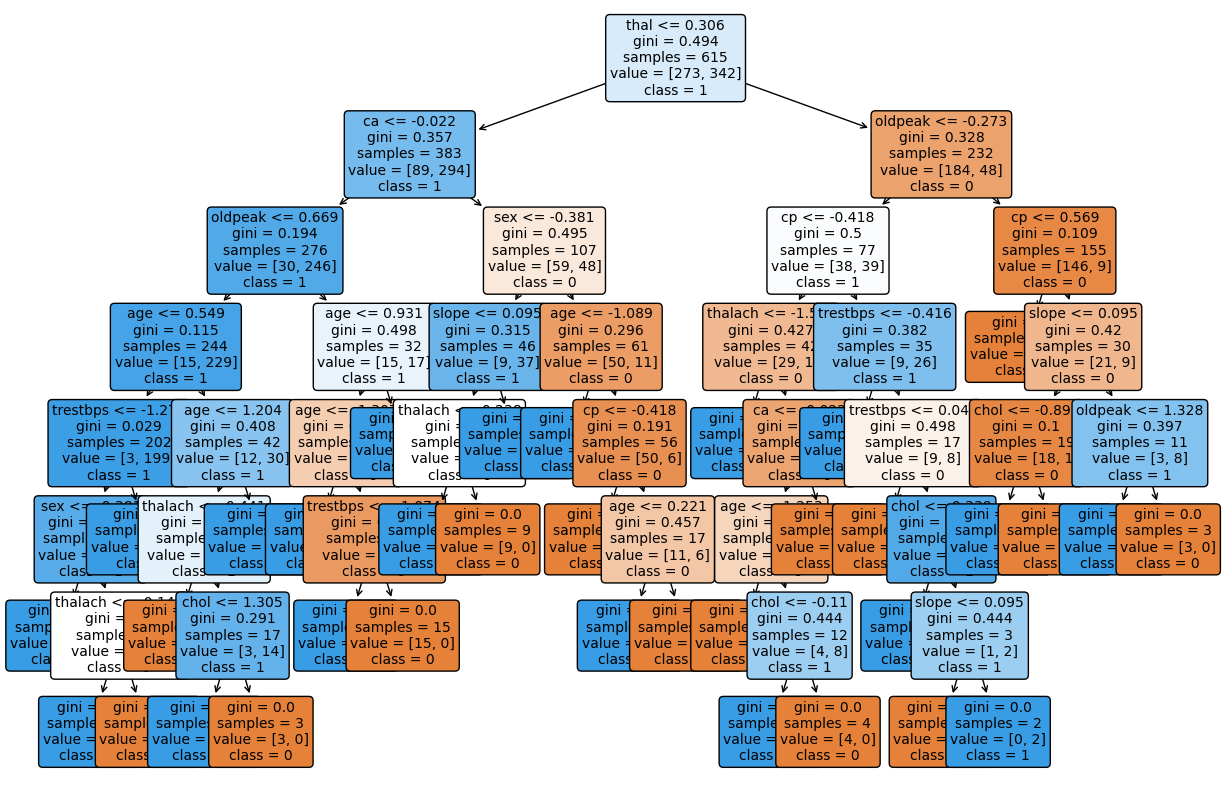

In [181]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15, 10))  # Adjust the figure size as needed
plot_tree(tree, 
          feature_names=X.columns,  # Use original column names before scaling
          class_names=['0', '1'],  # Adjust class names as needed
          filled=True, 
          rounded=True,
          fontsize=10)

plt.savefig('tree.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


## XGBoost

In [182]:
import xgboost as xgb
model = xgb.XGBClassifier()

model_xgb = model.fit(X_train, Y_train)

# first we need to predict the y values for the test set

y_pred_xgb = model_xgb.predict(X_test)


# now we can see how well we classified our data
train_score = model_xgb.score(X_train, Y_train)
test_predict_score = metrics.accuracy_score(Y_test, y_pred_xgb)

# print it out better
print('Accuracy of Train:', train_score)
print('Accuracy of (Test) Decision Tree Model:', test_predict_score)

Accuracy of Train: 1.0
Accuracy of (Test) Decision Tree Model: 0.9805194805194806


### using  SVC

Accuracy:92.208 %
Mean squared error:  0.078


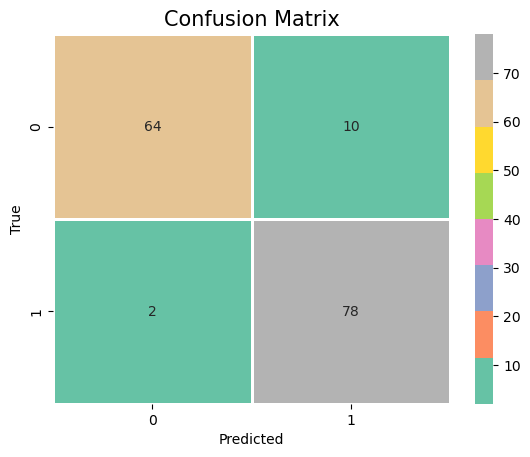

In [183]:
from sklearn.svm import SVC

svc= SVC()
svc.fit(X_train_scaled,Y_train)
Y_pred= svc.predict(X_test_scaled)

svc_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(svc,svc_accuracy,Y_pred)

### using  KNeighborsClassifier

Accuracy:85.065 %
Mean squared error:  0.149


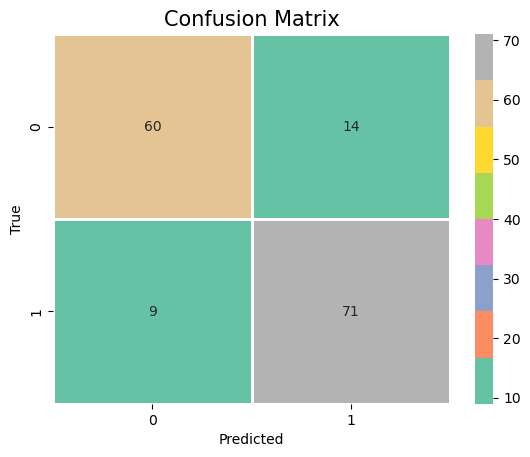

In [184]:
KNN= KNeighborsClassifier(n_neighbors=11)
KNN.fit(X_train_scaled,Y_train)
Y_pred= KNN.predict(X_test_scaled)

KNN_accuracy= round(accuracy_score(Y_test,Y_pred), 5)*100 # Accuracy

impressions(KNN,KNN_accuracy,Y_pred)

# Y_score = KNN.predict_proba(X_test)[:,1]
# roc_curve(Y_test,Y_score)

In [185]:
Y_score = KNN.predict_proba(X_test)[:,1]
Y_score

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0.63636364, 0.54545455, 0.63636364, 0.63636364, 0.54545455,
       0.54545455, 0.63636364, 0.63636364, 0.54545455, 0.63636364,
       0.63636364, 0.63636364, 0.54545455, 0.63636364, 0.54545455,
       0.54545455, 0.54545455, 0.54545455, 0.54545455, 0.81818182,
       0.81818182, 0.63636364, 0.63636364, 0.81818182, 0.63636364,
       0.81818182, 0.54545455, 0.63636364, 0.54545455, 0.54545455,
       0.54545455, 0.63636364, 0.54545455, 0.54545455, 0.54545455,
       0.54545455, 0.54545455, 0.54545455, 0.54545455, 0.63636364,
       0.54545455, 0.54545455, 0.54545455, 0.90909091, 0.63636364,
       0.54545455, 0.90909091, 0.63636364, 0.54545455, 0.54545455,
       0.54545455, 0.63636364, 0.54545455, 0.63636364, 0.54545455,
       0.54545455, 0.63636364, 0.54545455, 0.63636364, 0.54545455,
       0.54545455, 0.63636364, 0.81818182, 0.54545455, 0.54545455,
       0.63636364, 0.54545455, 0.54545455, 0.54545455, 0.54545455,
       0.54545455, 0.54545455, 0.63636364, 0.54545455, 0.63636

In [186]:
# X_test.iloc[0:1] # whenb not using StandardScaler

In [187]:
new_data = {'age':[50],'sex':[0],'cp':[80],'trestbps':[100],'chol':[200],'fbs':[1],'restecg':[0],'thalach':[150],
           'exang':[1],'oldpeak':[0.7],'slope':[3],'ca':[2],'thal':[1]}
d = pd.DataFrame(new_data)

In [188]:
y_score = KNN.predict_proba(d)[0]
y_score

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([0.36363636, 0.63636364])

In [189]:
y_score = svc.predict(d)
y_score

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([1])

In [190]:
y_score = tree.predict(d)
y_score

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([1])

In [191]:
y_score = opt_rf.predict_proba(d)[0]
y_score

/home/kali/anaconda3/lib/python3.11/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([0.375, 0.625])